### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [332]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [333]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [334]:
initial_data.shape[0] == processed_data.shape[0]

True

In [335]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [336]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [337]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [338]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

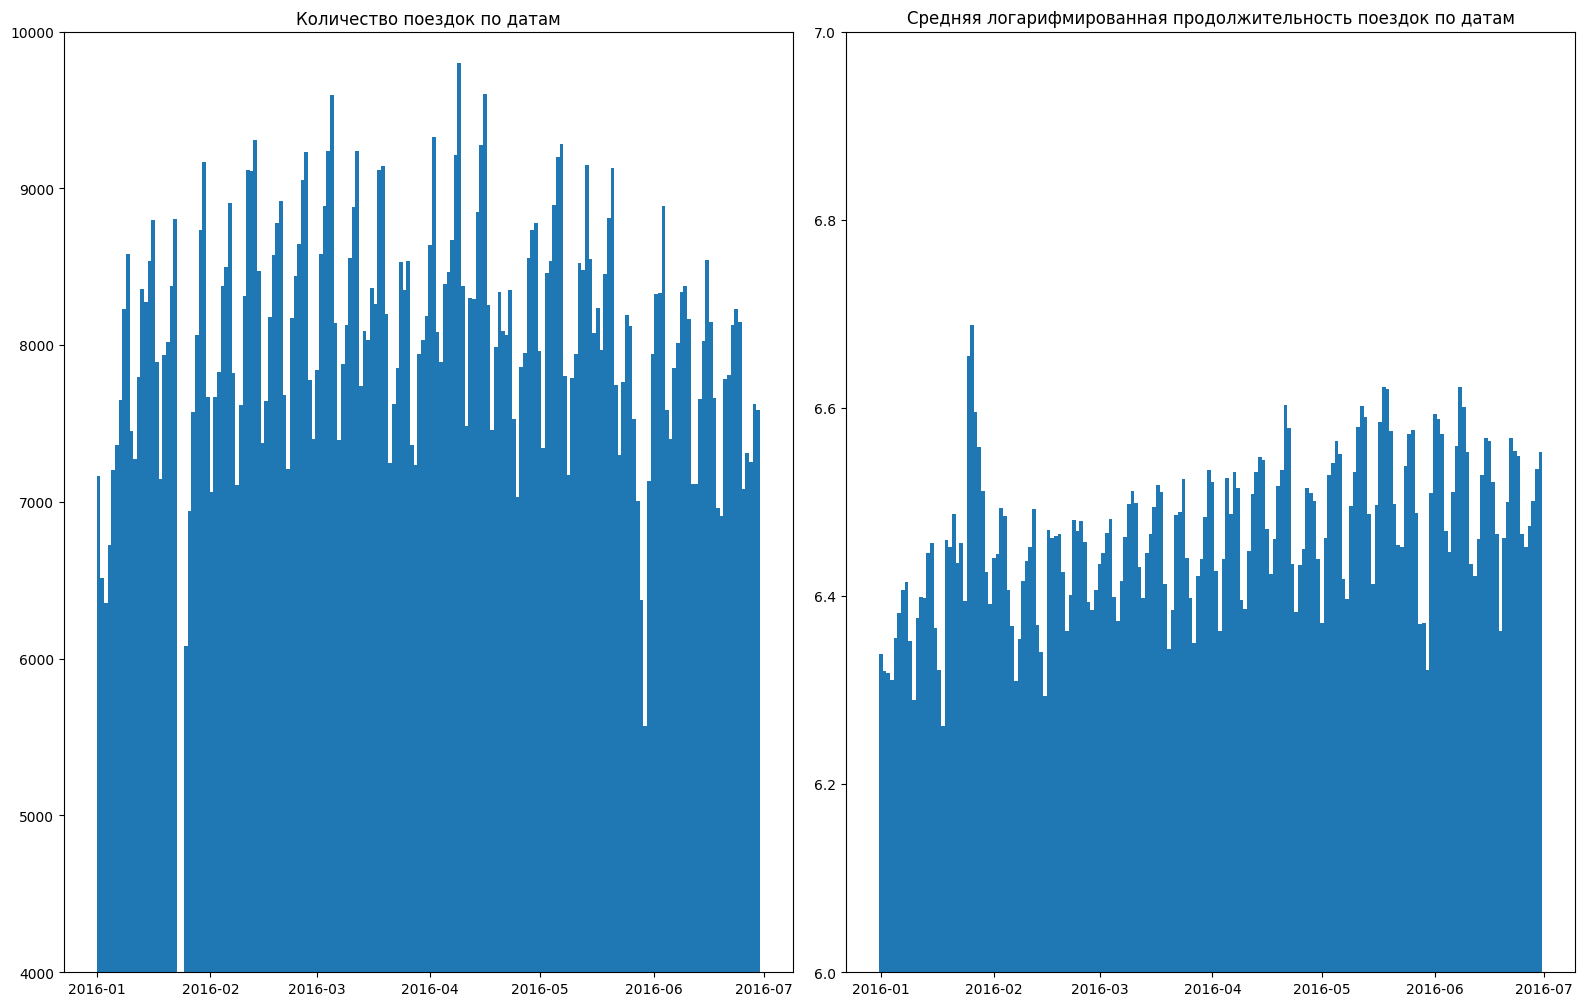

In [339]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


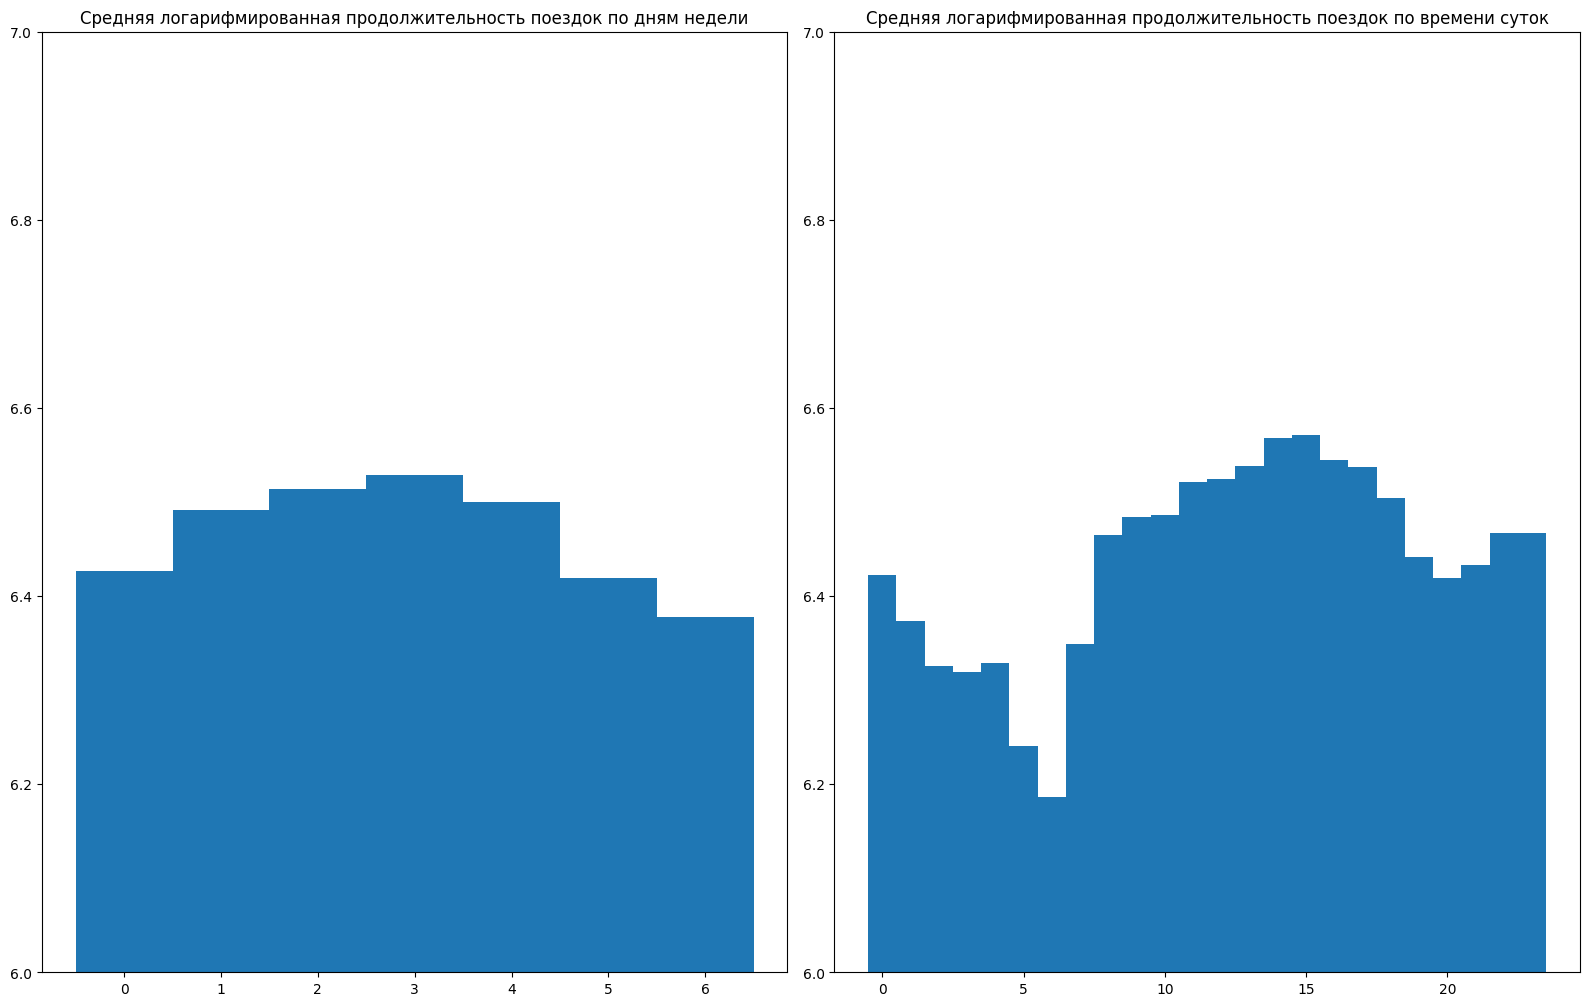

In [340]:
### Your code is here



fig = plt.figure()
fig.set_size_inches(16, 10)
ax_1 = fig.add_subplot(1, 2, 1)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))


fig.tight_layout()

ax_1.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по времени суток')

plt.show()


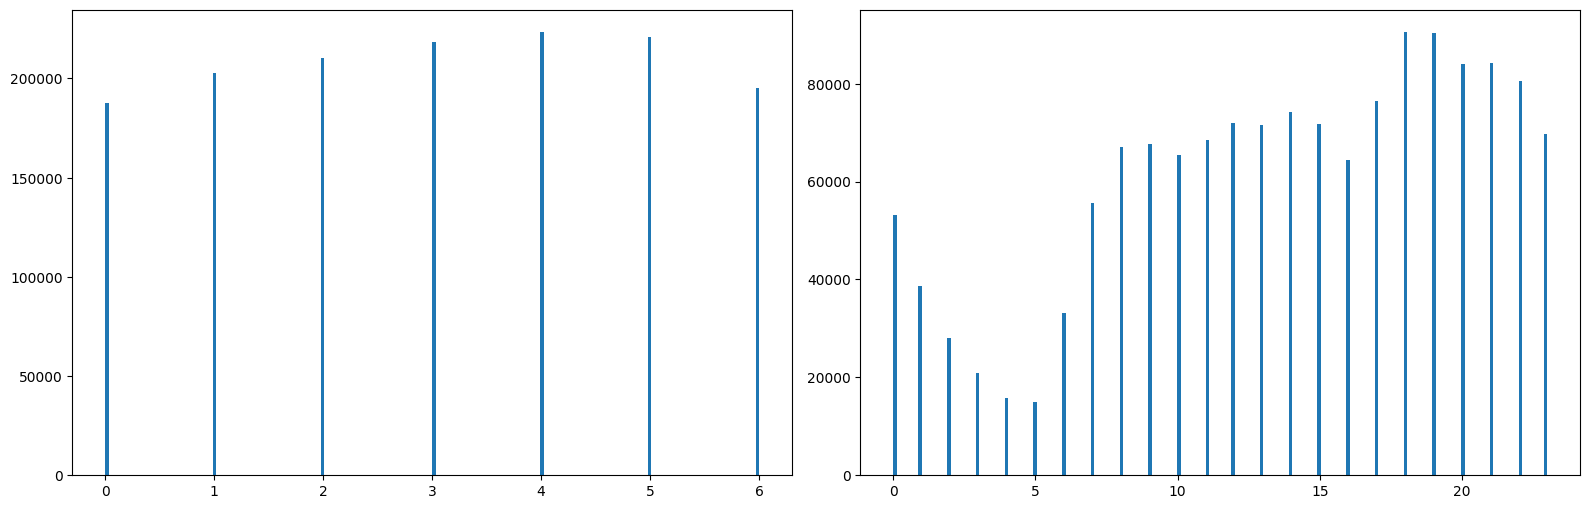

In [341]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax_3 = fig.add_subplot(2, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.date.unique().shape[0])
#plt.ylim((4000, 10000))
ax_4 = fig.add_subplot(2, 2, 2)
plt.hist(processed_data['hour'], bins=processed_data.date.unique().shape[0])
#plt.ylim((4000, 10000))
fig.tight_layout()
plt.show()

In [342]:
processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].count()

,day_of_week,log_trip_duration
0,0,187418
1,1,202749
2,2,210136
3,3,218574
4,4,223533
5,5,220868
6,6,195366


In [343]:
days_dict = {}

for day in processed_data['day_of_week'].unique():
    
    days_dict[day] = processed_data[processed_data['day_of_week']==day]['log_trip_duration']

month_dict = {}

for month in processed_data['month'].unique():
    
    month_dict[month] = processed_data[processed_data['month']==month]['log_trip_duration']

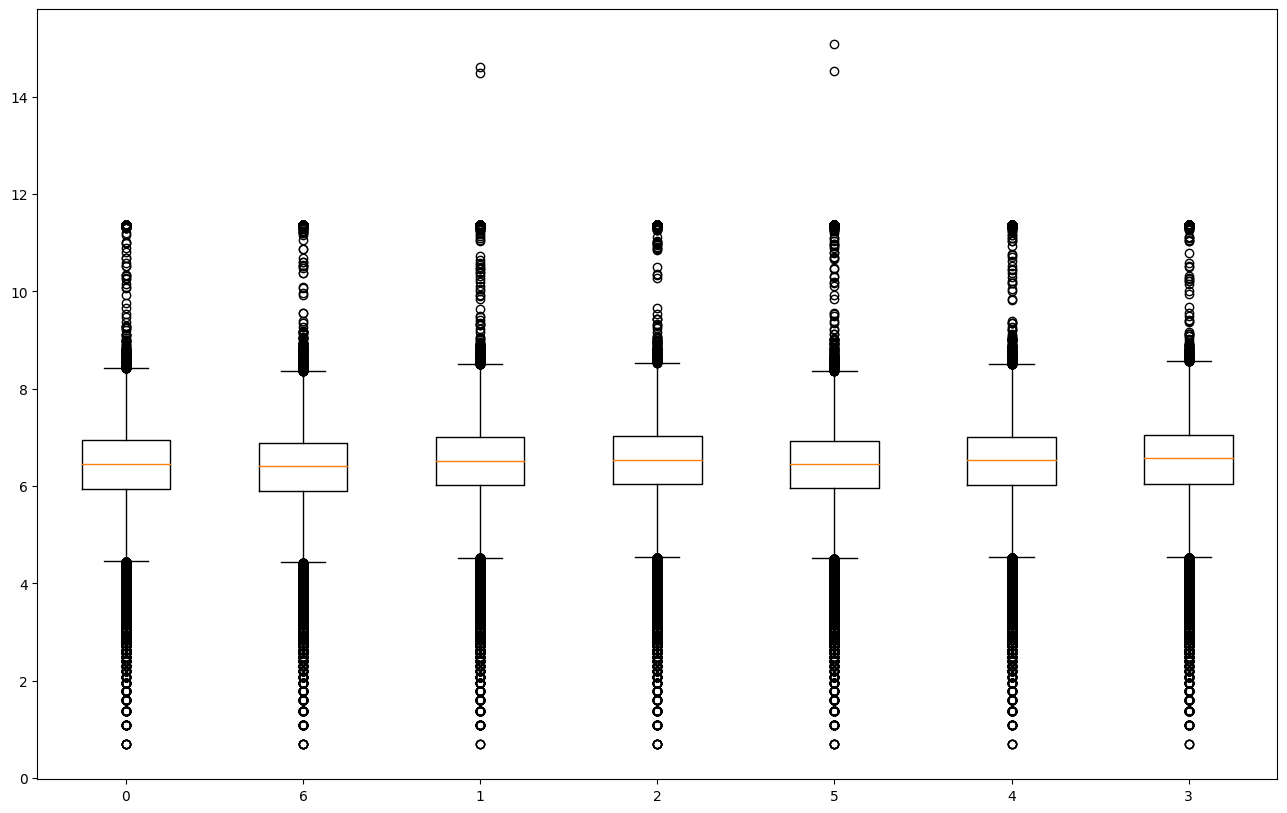

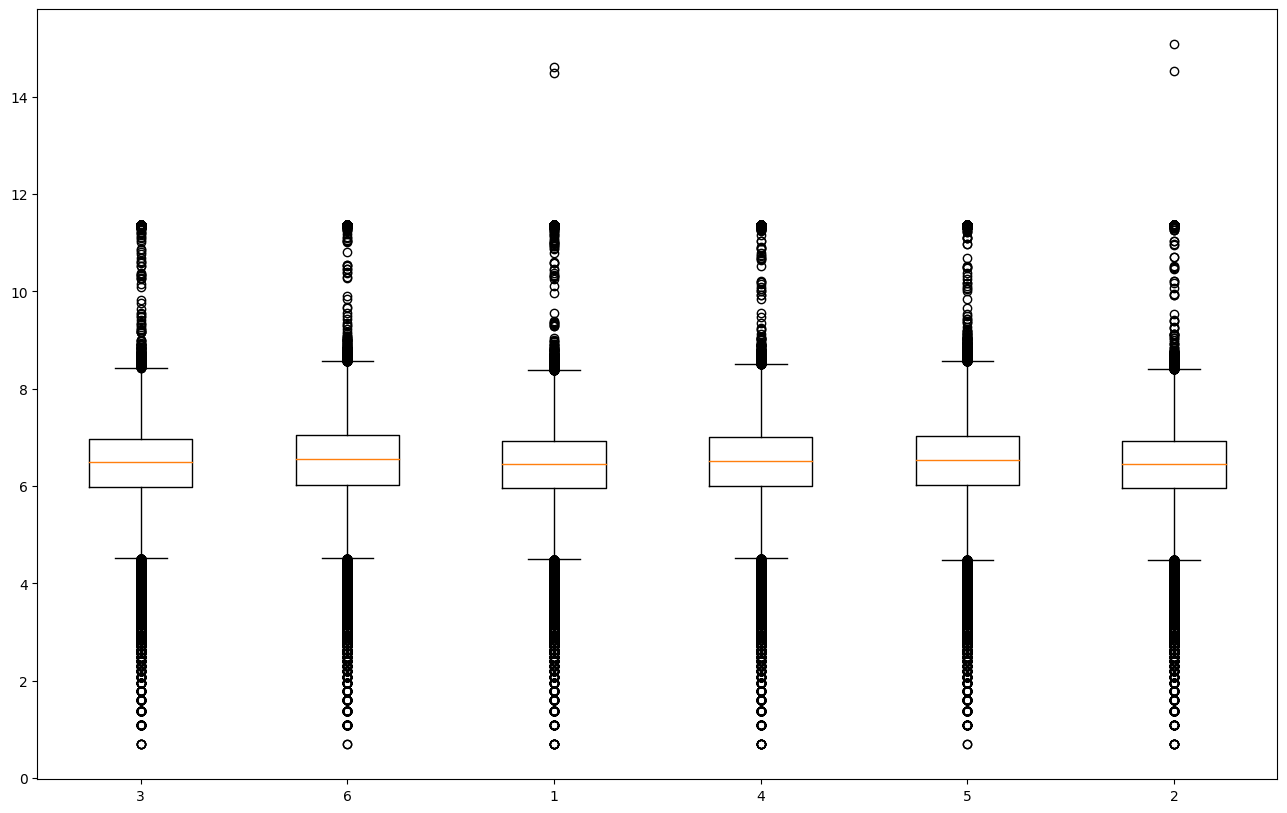

In [344]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.boxplot(days_dict.values(),
            labels=days_dict.keys())

#plt.ylim((0, 50000))

plt.show()
fig = plt.figure()
fig.set_size_inches(16, 10)
plt.boxplot(month_dict.values(),
            labels=month_dict.keys())

#plt.ylim((0, 50000))

plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [345]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [359]:
#processed_data = processed_data.drop('anomaly', axis=1)

In [347]:
### Создадим первый бинарный признак
### Your code is here
from datetime import datetime

date_str = '2016-01-23'

date_object = datetime.strptime(date_str, '%Y-%m-%d').date()
processed_data.loc[(processed_data['date'] == date_object), 'anomaly'] = 1
processed_data['anomaly'] = processed_data['anomaly'].fillna(0)

In [348]:
sum(processed_data['anomaly'])

1648.0

In [349]:
### Создадим второй бинарный признак
### Your code is here
test_object = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean().sort_values(by = ['log_trip_duration'], ascending=False)
comp_object = test_object.head(10).drop('log_trip_duration', axis=1)
processed_data.loc[(processed_data['day_of_week'].isin(comp_object['day_of_week']) & processed_data['hour'].isin(comp_object['hour'])), 'traffic_jam'] = 1
processed_data['traffic_jam'] = processed_data['traffic_jam'].fillna(0)
sum(processed_data['day_of_week'].isin(comp_object['day_of_week']) & processed_data['hour'].isin(comp_object['hour']))

198738

In [350]:
processed_data = processed_data.astype({'anomaly': 'int64', 'traffic_jam': 'int64'})

In [351]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


In [352]:
processed_data.shape
processed_data.dtypes

vendor_id                      int64
passenger_count              float64
store_and_fwd_flag             int64
distance_km                  float64
log_trip_duration            float64
pickup_datetime       datetime64[ns]
date                          object
day_of_week                    int64
hour                           int64
month                          int64
anomaly                        int64
traffic_jam                    int64
dtype: object

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [353]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [356]:
### Делаем OneHotEncoding и конкатим с processed_data


for col in ['day_of_week', 'hour', 'month']:
    processed_data = pd.concat((processed_data, pd.get_dummies(processed_data[col], prefix = col)), axis=1)
processed_data = processed_data.drop(['hour_0', 'month_1', 'day_of_week_0', 'day_of_week', 'hour', 'month'], axis=1)

    ### Your code is here

In [357]:
processed_data.dtypes

vendor_id               int64
passenger_count       float64
store_and_fwd_flag      int64
distance_km           float64
log_trip_duration     float64
anomaly                 int64
traffic_jam             int64
day_of_week_1           uint8
day_of_week_2           uint8
day_of_week_3           uint8
day_of_week_4           uint8
day_of_week_5           uint8
day_of_week_6           uint8
hour_1                  uint8
hour_2                  uint8
hour_3                  uint8
hour_4                  uint8
hour_5                  uint8
hour_6                  uint8
hour_7                  uint8
hour_8                  uint8
hour_9                  uint8
hour_10                 uint8
hour_11                 uint8
hour_12                 uint8
hour_13                 uint8
hour_14                 uint8
hour_15                 uint8
hour_16                 uint8
hour_17                 uint8
hour_18                 uint8
hour_19                 uint8
hour_20                 uint8
hour_21   

In [358]:
processed_data.head().to_csv("unit_7.csv", sep = ",")

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [361]:
### Your code is here
processed_data[['distance_km', 'passenger_count']].corr()


,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [ ]:
processed_data.head()

In [364]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector


x = processed_data.drop('log_trip_duration', axis=1)
y = processed_data['log_trip_duration']
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [367]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()
#sfs.get_support()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [372]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
data_8 = processed_data[sfs.get_feature_names_out()]
data_8
model_8 = LinearRegression()
model_8.fit(data_8, y)
np.mean((model_8.predict(data_8)-y)**2)

0.4144259356893434